# 03.05 bézier curves

##### code, support for section text

In [ ]:
if False: # settings for sensei
  from google.colab import auth
  from googleapiclient.discovery import build

  auth.authenticate_user()
  about = build('drive','v3').about().get(fields='user').execute()
  if about['user']['displayName'] == "Sun K.":

    # output to pdf setting
    from google.colab import output
    output.no_vertical_scroll()
    #output.no_horizontal_scroll() # sigh, doesnt exist

In [2]:
if True: # settings for the people
  import matplotlib.pyplot as plt
  import numpy as np


###### code, examples

In [5]:
def eg_15():

  x = lambda t: 1 + 6*pow(t,2) - 5*pow(t,3)
  y = lambda t: 1 + 6*t - 6*pow(t,2) + pow(t,3)

  h = 0.01
  imax = int(1/h)+1
  data = np.zeros((imax,2))
  for i in range(imax):
    t = i*h
    data[i,0] = x(t)
    data[i,1] = y(t)

  # plot, cfg
  plt.close("all")

  # plot, data
  plt.scatter(data[:,0],data[:,1],c="C0",marker=".",label="bezier")

  # plot, style
  plt.title("example 15\n")
  plt.ylabel("y")
  plt.xlabel("t")
  plt.xlim(0.5,3)
  plt.ylim(0.5,3)
  plt.grid()
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  # plot, show
  plt.show()


## 0 intro

first, some links:

- [fast, historic](https://www.youtube.com/watch?v=BThr1pb77Fo);
- [more mathy](https://www.youtube.com/watch?v=pnYccz1Ha34).

bézier curves are splines that allow the user to control the slopes at the knots. in return for the extra freedom, the smoothness of the ﬁrst and second derivatives across the knot, which are automatic features of the cubic splines of the previous section, are no longer guaranteed. bézier splines are appropriate for cases where corners (discontinuous first derivatives) and abrupt changes in curvature (discontinuous second derivatives) are occasionally needed.

pierre bézier developed the idea during his work for the renault automobile company. The same idea was discovered independently by paul de casteljau, working for citroen, a rival automobile company. it was top secret back in the day. however, bézier published first and got dibs on the naming. this is used all over design, manufacturing.

each segment of a planar bézier spline is determined by four points $(x_1,y_1), (x_2,y_2), (x_3,y_3), (x_4,y_4)$. the first and last are endpoints and the middle two are control points. the curve leaves $(x_1,y_1)$ along the tangent direction $(x_2-x_1,y_2-y_1)$ and ends at $(x_4,y_4)$ along the tangent direction $(x_4-x_3,y_4-y_3)$. the equations that accomplish this are expressed as a parametric curve $(x(t),y(t))$ for $0\le t\le 1$.

<b>bézier curve</b>

given endponts $(x_1,y_1),(x_4,y_4)$ and control points $(x_2,y_2),(x_3,y_3)$ set

\begin{align}
  b_x &= 3(x_2 - x_1) \\
  c_x &= 3(x_3 - x_2) - b_x \\
  d_x &= x_4 - x_1 - b_x - c_x \\
  b_y &= 3(y_2 - y_1) \\
  c_y &= 3(y_3 - y_2) - b_y \\
  d_y &= y_4 - y_1 - b_y - c_y.
\end{align}

the bézier curve is defined by $0\le t\le 1$ by

\begin{align}
  x(t) &= x_1 + b_xt + c_xt^2 + d_xt^3 \\
  y(t) &= y_1 + b_yt + c_yt^2 + d_yt^3.
\end{align}

##### example 11, continued

\begin{align}
  x(0) &= x_1 \\
  x'(0) &= 3(x_2 - x_1) \\
  x(1) &= x_4 \\
  x'(1) &= 3(x_4 - x_3) \\
\end{align}

and the analogous facts hold for $y(t)$.

##### example 15

find bézier curve $(x(t),y(t))$ through points $(x,y)=(1,1),(2,2)$ with control points $(1,3),(3,3)$.

###### answer

\begin{align}
  x(t) &= 1 + 6t^2 - 5t^3 \\
  y(t) &= 1 + 6t - 6t^2 + t^3
\end{align}

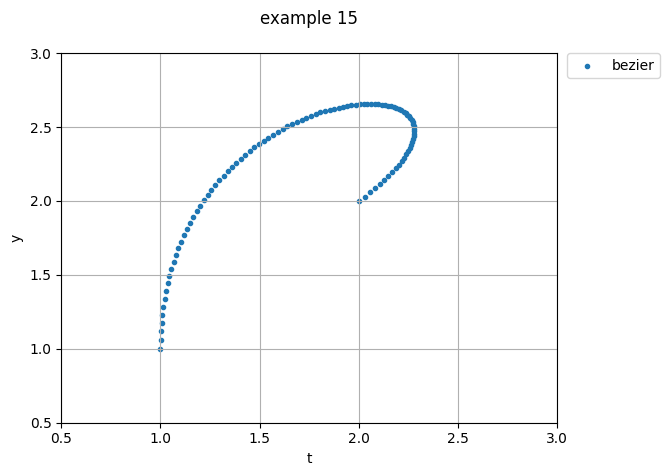

In [6]:
eg_15()